<a id='head'></a>

# Исследование объявлений о продаже квартир

## Оглавление
 
- [**Введение**](#intro)
    - [Цели исследования](#purpose)
    - [Ход исследования](#progress)
    
- [**1. Обзор данных**](#review)
    - [Выводы](#review_conclusions)

- [**2. Предобработка данных**](#preprocessing)
    - [2.1 Пропущенные значения](#preprocessing_01)
    - [2.2 Преобразования типов](#preprocessing_02)
    - [2.3 Проверка на дубликаты](#preprocessing_03)
    - [2.4 Выводы](#preprocessing_04)

- [**3. Расчёты и дообогащение таблицы данными**](#data_enrichment)
    - [3.1 Площадь](#data_enrichment_01)
    - [3.2 Дата](#data_enrichment_02)
    - [3.3 Категория этажа](#data_enrichment_03)
    - [3.4 Выводы](#data_enrichment_04)
    
- [**4. Исследовательский анализ данных**](#research)
    - [4.1 Анализ базовых параметров](#research_01)
    - [4.2 Время продажи квартиры](#research_02)
    - [4.3 Редкие и выбивающиеся значения](#research_03)
    - [4.4 Факторы влияющие на стоимость квартиры](#research_04)
    - [4.5 Анализ недвижимости относительно населенных пунктов](#research_05)
    - [4.6 Исследование зависимости цены от расстояния от центра города](#research_06)
    - [4.7 Стоимость квартир в центре города](#research_07)

- [**5. Общий вывод**](#final_conclusion)
    - [5.1 Общая информация](#final_conclusion_01)
    - [5.2 Предобработка данных](#final_conclusion_02)
    - [5.3 Расчеты и дообогщение таблицы](#final_conclusion_03)
    - [5.4 Итоги исследования](#final_conclusion_04)

- [Чек лист](#check_list)

<a id='intro'></a>
## Введение

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id='purpose'></a>
### Цели исследования [▴](#head)

**Провести исследовательский анализ данных:**

- Изучить следующие параметры: 
    - площадь, цена, число комнат, высота потолков. 
    - построить гистограммы для каждого параметра. 
- Изучить время продажи квартиры. 
    - построить гистограмму. 
    - посчитать среднее и медиану. 
    - описать, сколько обычно занимает продажа. 
    - когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 
- Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены. 
- Определить какие факторы больше всего влияют на стоимость квартиры? 
    - изучить, зависит ли цена от площади, числа комнат, удалённости от центра. 
    - изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
    - также изучите зависимость от даты размещения: дня недели, месяца и года. 
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. 
     - посчитать среднюю цену квадратного метра в этих населённых пунктах. 
     - выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name. 
- Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
    - Выделить квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. 
    - Создать столбец с расстоянием до центра в километрах: округлить до целых значений. 
    - после этого посчитать среднюю цену для каждого километра. 
    - построить график: он должен показывать, как цена зависит от удалённости от центра. 
    - определить границу, где график сильно меняется, — это и будет центральная зона. 
- Выделить сегмент квартир в центре. 
    - проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. 
    - также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
    - сделать выводы. Отличаются ли они от общих выводов по всей базе?


<a id='progress'></a>
### Ход исследования [▴](#head)

- Входные данные это архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет из сервиса Яндекс Недвижимость.
- Информации, какого они качества, у нас нет. Требуется самостоятельно выполнить следующие действия:
    - проверить данные на пропуски, а так же заполнить их, где это уместно.
    - указать причины которые могли привести к пропускам данных.
    - описать обоснование, по которому происходил выбор столбцов, а так же значений для замены.
    - проверить данные на аномальные значения и дубликаты.
    - привести данные к нужным типам.
    - описать обоснование по выбору типа данных.
- Требуется дообогатить таблицу следующими расчетными данными:
    - цена квадратного метра; 
    - день недели, месяц и год публикации объявления
    - этаж квартиры; варианты — первый, последний, другой
    - соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Исследование пройдет в несколько этапов:
    - [Обзор данных](#review)
    - [Предобработка данных](#preprocessing)
    - [Расчёты и дообогащение таблицы данными](#data_enrichment)
    - [Исследовательский анализ данных](#research)
    - [Общий вывод](#final_conclusion)

<a id='review'></a>
## 1. Обзор данных [▴](#head)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# для того чтобы код работал локально и на Практикуме применим конструкцию try-except
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

Первым делом ознакомимся с заголовками таблицы

In [2]:
print(*list(df.columns), sep='\n')

total_images
last_price
total_area
first_day_exposition
rooms
ceiling_height
floors_total
living_area
floor
is_apartment
studio
open_plan
kitchen_area
balcony
locality_name
airports_nearest
cityCenters_nearest
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
days_exposition


Несколько заголовков имеют не очень удобное имя для последующего использования. Исправим это, чтобы потом не путаться.

In [3]:
df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest', 
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }, inplace=True
)

Теперь визуально ознакомимся с таблицей. Для того чтобы все поместилось на одной странице, подробим ее на три части.

In [4]:
display(df.loc[:,:'floor'].head())
display(df.loc[:,'is_apartment':'city_centers_nearest'].head())
display(df.loc[:,'parks_around_3000':].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13


,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest
0,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0
1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0
2,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0
3,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0
4,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0


,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,1.0,482.0,2.0,755.0,NaN
1,0.0,NaN,0.0,NaN,81.0
2,1.0,90.0,2.0,574.0,558.0
3,2.0,84.0,3.0,234.0,424.0
4,2.0,112.0,1.0,48.0,121.0


**Исходная таблица содержит следующие данные:**

- `total_images` — число фотографий квартиры в объявлении
- `last_price` — цена на момент снятия с публикации 
- `total_area` — площадь квартиры в квадратных метрах (м²) 
- `first_day_exposition` — дата публикации 
- `rooms` — число комнат 
- `ceiling_height` — высота потолков (м) 
- `floors_total` — всего этажей в доме 
- `living_area` — жилая площадь в квадратных метрах (м²) 
- `floor` — этаж 
- `is_apartment` — апартаменты (булев тип) 
- `studio` — квартира-студия (булев тип) 
- `open_plan` — свободная планировка (булев тип) 
- `kitchen_area` — площадь кухни в квадратных метрах (м²) 
- `balcony` — число балконов 
- `locality_name` — название населённого пункта 
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) 
- `city_centers_nearest` — расстояние до центра города (м) 
- `parks_around_3000` — число парков в радиусе 3 км 
- `parks_nearest` — расстояние до ближайшего парка (м) 
- `ponds_around_3000` — число водоёмов в радиусе 3 км 
- `ponds_nearest` — расстояние до ближайшего водоёма (м) 
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия) 

Посмотрим на тип данных и их количество.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице есть есть пропущенные значения. А так-же ряд столбцов, в которых не помешает заменить тип данных. Запишем необходимый тип преобразований:

`int`
- balcony
- last_price

`float32`
- total_area
- ceiling_height
- floors_total
- living_area
- kitchen_area
- airports_nearest
- city_сenters_nearest
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest
- days_exposition

`DateTime`
- first_day_exposition

Проверим таблицу на аномальные значения

In [6]:
display(df.loc[:,:'balcony'].describe())
display(df.loc[:,'airports_nearest':].describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000


,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отрицательных чисел нет, уже хорошо. Однако в таблице встречаются значения, которые вызывают подозрения, запишем их и решим, что с ними делать, чуть позже:
- `last_price` - подозрительно малое минимальное. 12 тыс. за квартиру. Возможно цену вбивали в долларах, но у нас то рубли. 
- `last_price` - подозрительно большое максимальное значение. 763 млн за квартиру. Столько квратира вполне может стоить, но для нашей задачи это очевидный выброс и будет только портить статистику.
- `total_area` - площадь квартиры 900 м². Скорей всего для нас это выброс. Это больше похоже на огромное загородное имение нежели на рядовую квартиру
- `rooms` - 19 комнат, тоже больше походит на гигантский загородный дом.
- `ceiling_height` - явная беда с минимальный им максимальным значениями: 1 и 100 метров. Думаю в объявлении нет квартир для хоббитов и великанов
- `floors_total` - дом в 60 этажей, скорей всего выброс для наших данных.
- `balcony` - 5 балконов, наверное многовато для рядовой квартиры.
- `days_exposition` - срок публикации 1580 дней. Явно про эти объявления забыли. А для нас это выброс.

<a id='review_conclusions'></a>
### Выводы [▴](#head)

- Количество данных для решения нашей задачи на первый взгляд достаточно. 
- В таблице есть пропущенные значения и явные выбросы. Разберемся с ними. 
- Неплохо будет поменять тип числовых данных с `float64` на `float32` для экономии памяти.
- Так же будет неплохоо дообогатить исходную таблицу информацией, которыую мы можем высчитать из исходных данных.

<a id='preprocessing'></a>
## 2. Предобработка данных

<a id='preprocessing_01'></a>
### 2.1 Пропущенные значения  [▴](#head)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Пропущенные знаения есть в следующих столбцах:**
- `ceiling_height` - Высота потолков. Пропуски в данных скорей всего из-за того, что эти данные просто не указали. Так как разброс в этом типе данных небольшой, вполне можно заменить на среднее значение.
- `floors_total` - Всего этажей. Заменить на какое-то значение тут трудно. На первый взгляд их немного. Высчитаем долю этих пропусков и удалим.
- `living_area` - Жилая площадь. Скорей всего не указана при заполнении. Для решении нашей задачи это значение не пригодится. Оставим как есть.
- `is_apartment` - Аппартаменты. Много пропущенных значений. Скорей всего при заполнении просто не указывали, если продавалась именно квартира. Заполним пропущенные значения на `False`
- `kitchen_area` - Площадь кухни. Подобрать замену для этих значений проблемно. Оставим как есть. На результаты нашего исследования они не повлияют.
- `balcony` - Пропуски в столбце `Балконы`, скорей всего означает что их просто нет. Заменим эти значения на `0`
- `locality_name` - Населенный пункт. Адекватную замену подобрать нет возможности. Пропусков на первый взгляд мало. Высчитаем долю и удалим значения.
- `airports_nearest` - Расстояние до аэропорта. Опциональная информация. Замену подобрать трудно. Оставим как есть.
- `city_centers_nearest` - Расстояние до центра города. Опциональная информация. Замену подобрать трудно. Оставим как есть.
- `parks_around_3000` - Количество парков в пределах 3 км. Опциональная информация. Замену подобрать трудно. Оставим как есть.
- `parks_nearest` - Расстояние до ближайшего парка. Опциональная информация. Замену подобрать трудно. Оставим как есть.
- `ponds_around_3000` - Количество водоемов в пределах 3 км. Опциональная информация. Замену подобрать трудно. Оставим как есть.
- `ponds_nearest` - Расстояние до ближайшего водоема. Опциональная информация. Замену подобрать трудно. Оставим как есть.
- `days_exposition` - Сколько дней было размещено объявление. Опциональная информация. Замену подобрать трудно. Оставим как есть.

**Высота потолков**

In [8]:
print('Пропущено: ', df['ceiling_height'].isna().sum())
print(df['ceiling_height'].head())

Пропущено:  9195
0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
Name: ceiling_height, dtype: float64


In [9]:
df['ceiling_height'].fillna(value=df['ceiling_height'].mean(), inplace=True)

In [10]:
# Проверим что все сработало

print('Пропущено: ', df['ceiling_height'].isna().sum())
print(df['ceiling_height'].head())

Пропущено:  0
0    2.700000
1    2.771499
2    2.771499
3    2.771499
4    3.030000
Name: ceiling_height, dtype: float64


**Всего этажей**

In [11]:
print('Пропущено:', df['floors_total'].isna().sum())
print(f'Доля в общих данных: {df["floors_total"].isna().sum() / df.shape[0]:.1%}', )

Пропущено: 86
Доля в общих данных: 0.4%


Менее чем пол процента, удаляем со спокойной душой.

In [12]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True) # удаляем NaN строки и перезаписываем индексы
print('Пропущено:', df['floors_total'].isna().sum())

Пропущено: 0


**Аппартаменты**

Статус `Это аппартаменты` хранится в таблице как тип `object`, заменим пропущенные значения и сразу преобразуем столбец в `bool`

In [13]:
print('Пропущено:', df['is_apartment'].isna().sum())
df['is_apartment'].value_counts()

Пропущено: 20838


False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
df['is_apartment'].fillna(value=False, inplace=True) # Заменяем NaN на False
df['is_apartment'] = df['is_apartment'].astype('bool') # Преобразовываем в bool тип

In [15]:
# Проверим на всякий случай

print('Пропущено:', df['is_apartment'].isna().sum())
df['is_apartment'].value_counts()

Пропущено: 0


False    23563
True        50
Name: is_apartment, dtype: int64

**Балконы**

In [16]:
print('Пропущено:', df['balcony'].isna().sum())
print(df['balcony'].head())

Пропущено: 11480
0    NaN
1    2.0
2    0.0
3    0.0
4    NaN
Name: balcony, dtype: float64


In [17]:
df['balcony'].fillna(value=0, inplace=True)

In [18]:
# Проверим что все сработало

print('Пропущено:', df['balcony'].isna().sum())
print(df['balcony'].head())

Пропущено: 0
0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: balcony, dtype: float64


**Населенный пункт**

In [19]:
print('Пропущено:', df['locality_name'].isna().sum())
print(f'Доля в общих данных: {df["locality_name"].isna().sum() / df.shape[0]:.1%}', )

Пропущено: 48
Доля в общих данных: 0.2%


Менее чем пол процента, удаляем со спокойной душой.

In [20]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True) # удаляем NaN строки и перезаписываем индексы
print('Пропущено:', df['locality_name'].isna().sum())

Пропущено: 0


Проверим, не осталось ли пропущенных значений в ключевых столбцах:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<a id='preprocessing_02'></a>
### 2.2 Преобразование типов  [▴](#head)

**Преобразование числовых значений**

In [22]:
df = df.astype(
    {
        # конвертируем в int
        'balcony': 'int32',
        'last_price': 'int64',
        
        # конвертируем во float32
        'total_area': 'float32',
        'ceiling_height': 'float32',
        'floors_total': 'float32',
        'living_area': 'float32',
        'kitchen_area': 'float32',
        'airports_nearest': 'float32',
        'city_centers_nearest': 'float32',
        'parks_around_3000': 'float32',
        'parks_nearest': 'float32',
        'ponds_around_3000': 'float32',
        'ponds_nearest': 'float32',
        'days_exposition': 'float32'
    }
)

**Преобразование даты**

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Проверим результаты преобразований

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float32       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float32       
 6   floors_total          23565 non-null  float32       
 7   living_area           21700 non-null  float32       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float32       
 13  balcony         

Все отлично. Дата, теперь дата, булевы значения - булевы. А вещественные числа преобразованы во `float32`, для экономии памяти.

<a id='preprocessing_03'></a>
### 2.3 Проверка на дубликаты  [▴](#head)

In [25]:
print(f'Количество дубликатов: {df.duplicated().sum()}')

Количество дубликатов: 0


Дубликатов, нет. Отлично.

Проверим наши данные на неявные дубликаты. Текстовые данные у нас содержатся только в столбце `locality_name`. Осмотрим его.

Сначала выведем количество уникальных значений в текущем виде:

In [26]:
len(df['locality_name'].unique())

364

Теперь удалим символы-возмутители спокойствия. Это будут `заглавные буквы`, `пробелы` и `тире` и опять посчитаем количество уникальных значений.

In [27]:
len(
    df['locality_name']
    .str.lower()
    .str.replace(' ', '')
    .str.replace('-', '')
    .unique()
)

364

Количество совпало. По всей видимости неявных дубликатов в таблице нет. Это радует!

<a id='preprocessing_04'></a>
### 2.4 Выводы  [▴](#head)

В ключевых данных о квартире встретилось некоторое кличество пропущенных значений. Часть пришлось удалить, так как адекватной замены подобрать не удалось. Другие мы постарались заменить на наиболее удачное. Не в ключевых столбцах пропущенные значения не обрабатывались.

Удалены пропуски:
- `Всего этажей`
- `Населенный пункт`

Заменены пропуски:
- `Высота потолков` - NaN на `среднее` (2.77)
- `Аппартаменты` - NaN на `False`
- `Балконы` - NaN на `0`

Не тронуты пропуски:
- `living_area`
- `kitchen_area`
- `airports_nearest`
- `city_centers_nearest`
- `parks_around_3000`
- `parks_nearest`
- `ponds_around_3000`
- `ponds_nearest`
- `days_exposition`


Было проведено преобразование типов:
- Вещественные числа переведены из `float64` в `float32` для экономии памяти.
- Дата из текстового значения переведена в `datetime64[ns]`
- Количество балконов переведены из `float64` в `int`
- Цена квартиры переведена из `float64` в `int`


<a id='data_enrichment'></a>
## 3. Расчёты и дообогащение таблицы данными

Сформируем новые столбцы на основе вычислений из существующих данных.

<a id='data_enrichment_01'></a>
### 3.1 Площадь [▴](#head)

In [28]:
df['cost_per_square_meter'] = df['last_price'] / df['total_area'] # Стоимость за квадратный метр
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] # Отношение площади кухни к общей
df['life_area_ratio'] = df['living_area'] / df['total_area'] # Отношение жилой площади к общей

<a id='data_enrichment_02'></a>
### 3.2 Дата [▴](#head)

In [29]:
df['exposition_day'] = df['first_day_exposition'].dt.weekday # День недели публикации объявления
df['exposition_month'] = df['first_day_exposition'].dt.month # Месяц публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year # Год публикации объявления

<a id='data_enrichment_03'></a>
### 3.3 Категория этажа [▴](#head)

Напишем функцию, котороая обойдет датафрейм построчно и раскидает значения по категориям в зависимости от условия.

In [30]:
def floor_cat(row):
    if row['floor'] == 1: # Если этаж == 1, по категория "Первый"
        return 'Первый' 
    elif row['floor'] == row['floors_total']: # Если номер этажа == количеству этажей в здании, то категория "Последний"
        return 'Последний'
    else:
        return 'Другой' # Иначе категория "Другой"

df['floor_category'] = df.apply(floor_cat, axis=1)

<a id='data_enrichment_04'></a>
### 3.4 Выводы [▴](#head)

Были добавлены следующие расчетные столбцы:
- `cost_per_square_meter` - стоимость квадратного метра
- `kitchen_area_ratio` - доля площади кухни от общей
- `life_area_ratio` - доля жилой площади от общей
- `exposition_day` - день недели публикации объявления
- `exposition_month` - месяц публикации объявления
- `exposition_year` - год публикации объявления
- `floor_category` - тип этажа (первый/последний/другой)


<a id='research'></a>
## 4. Исследовательский анализ данных

Для удобства разместим полный список столбцов нашего датафрейма.

**Исходные данные:**

- `total_images` — число фотографий квартиры в объявлении
- `last_price` — цена на момент снятия с публикации 
- `total_area` — площадь квартиры в квадратных метрах (м²) 
- `first_day_exposition` — дата публикации 
- `rooms` — число комнат 
- `ceiling_height` — высота потолков (м) 
- `floors_total` — всего этажей в доме 
- `living_area` — жилая площадь в квадратных метрах (м²) 
- `floor` — этаж 
- `is_apartment` — апартаменты (булев тип) 
- `studio` — квартира-студия (булев тип) 
- `open_plan` — свободная планировка (булев тип) 
- `kitchen_area` — площадь кухни в квадратных метрах (м²) 
- `balcony` — число балконов 
- `locality_name` — название населённого пункта 
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) 
- `city_centers_nearest` — расстояние до центра города (м) 
- `parks_around_3000` — число парков в радиусе 3 км 
- `parks_nearest` — расстояние до ближайшего парка (м) 
- `ponds_around_3000` — число водоёмов в радиусе 3 км 
- `ponds_nearest` — расстояние до ближайшего водоёма (м) 
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

**Расчетные данные**
- `cost_per_square_meter` - стоимость квадратного метра
- `kitchen_area_ratio` - доля площади кухни от общей
- `life_area_ratio` - доля жилой площади от общей
- `exposition_day` - день недели публикации объявления
- `exposition_month` - месяц публикации объявления
- `exposition_year` - год публикации объявления
- `floor_category` - тип этажа (первый/последний/другой)


<a id='research_01'></a>
### 4.1 Анализ базовых параметров [▴](#head)

Требуется изучить следующие параметры: 
- площадь, цена, число комнат, высота потолков. 
- построить гистограммы для каждого параметра. 

Выполним предварительный осмотр гистограмм.

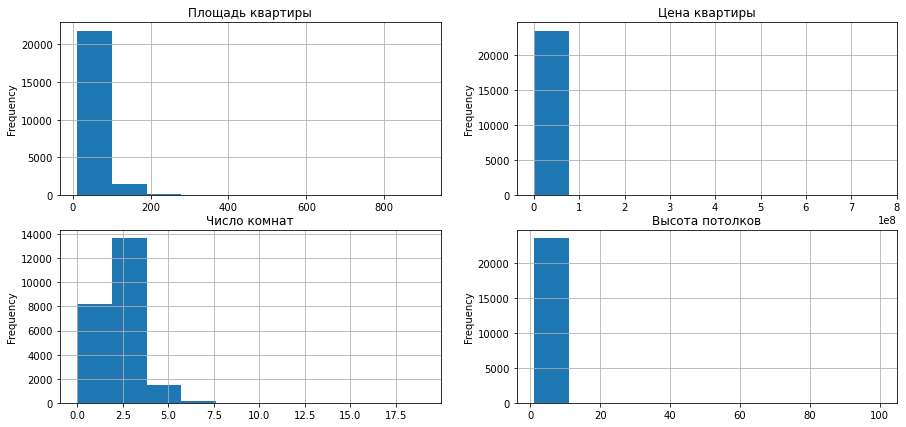

In [31]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
df['total_area'].plot(kind='hist', grid=True)
plt.title('Площадь квартиры')

plt.subplot(2,2,2)
df['last_price'].plot(kind='hist', grid=True)
plt.title('Цена квартиры')

plt.subplot(2,2,3)
df['rooms'].plot(kind='hist', grid=True)
plt.title('Число комнат')

plt.subplot(2,2,4)
df['ceiling_height'].plot(kind='hist', grid=True)
plt.title('Высота потолков')

plt.show()

Сразу бросается в глаза что в данных огромные выбросы. Надо что-то с этим делать, иначе каждый график придется подгонять руками.

#### Коробка с усами

Для решения нашей проблемы прибегнем к диаграмме размаха. 

А именно напишем функцию, которая будет возвращать крайние значения "усов" диаграммы размаха.

In [32]:
def whisker_find(df_ser): # Функция принимает на врод любой Series из датафрейма
    dict_from_desc = df_ser.describe().to_dict() # Считываем describe.() значения из нашего Series и 
                                                # передаем их в словарь dict_from_desc
    # далее вычисляем крайние значения "усов" обращаясь к нужным ключам словаря
    bottom_whisker = dict_from_desc['25%'] - ((dict_from_desc['75%'] - dict_from_desc['25%']) * 1.5)
    top_whisker = dict_from_desc['75%'] + ((dict_from_desc['75%'] - dict_from_desc['25%']) * 1.5)
    if bottom_whisker < dict_from_desc['min']: # если "нижний ус" меньше чем минимальное значение по Series
        bottom_whisker = dict_from_desc['min'] # то "нижний ус" = минимальному значению
 
    return round(bottom_whisker, 2), round(top_whisker, 2) #возвращаем значения усов с округлением

print(whisker_find(df['ceiling_height'])) # магия! Высота потолков здорового человека.

(2.34, 3.03)


Построим заново диаграммы, подставив в параметр `range()` результат работы функции, по поиску значений без выбросов, а так же отредактируем количество корзин под каждый случай индивидуально.

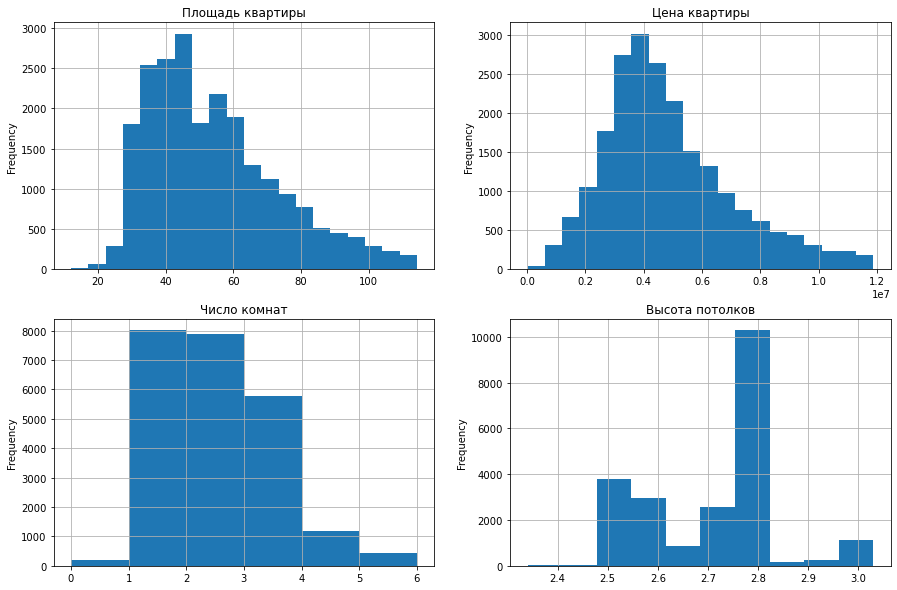

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['total_area'].plot(kind='hist', bins=20, grid=True, range=(whisker_find(df['total_area'])))
plt.title('Площадь квартиры')

plt.subplot(2, 2, 2)
df['last_price'].plot(kind='hist', bins=20, grid=True, range=(whisker_find(df['last_price'])))
plt.title('Цена квартиры')

plt.subplot(2, 2, 3)
df['rooms'].plot(kind='hist', bins=6, grid=True, range=(whisker_find(df['rooms'])))
plt.title('Число комнат')

plt.subplot(2, 2, 4)
df['ceiling_height'].plot(kind='hist', bins=10, grid=True, range=(whisker_find(df['ceiling_height'])))
plt.title('Высота потолков')

plt.show()

Так значительно лучше. Теперь гистограммы имеют "здоровый" вид, не подвержены выбросам и мы можем проаналитзировать их.

#### Вывод
После предварительно проверки, оказалось, что в данных присутствуют достаточно большие выбросы.

Мы написали функцию, чтобы оперативно избавляться от выбросов в наших будущих графиках и гистограммах.

- `Площадь квартиры` - Основная масса квартир на продаже имеют площадь 35-60 метров. При дальнейшем росте площади, количество предложений равномерно снижается.
- `Цена квартиры` - Гистограмма цен на квартиры совпадает по форме и размеру гистограммой площади. Следовательно основная масса квартир 35-60 метров продается по стоимости 3-5 млн. 
- `Число комнат` - Из этой гистограммы мы видим что количество двушек и однушек примерно одинаково на рынке, чуть меньше трешек, а квариры с 4 комнатами и более совсем редкость.
- `Высота потолков` - В среднем на рынке преобладают потолки высотой 2.8 м. Другие значения встречачются значительно реже.

<a id='research_02'></a>
### 4.2 Время продажи квартиры [▴](#head)

Изучить время продажи квартиры. 
- построить гистограмму. 
- посчитать среднее и медиану. 
- описать, сколько обычно занимает продажа. 
- когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 

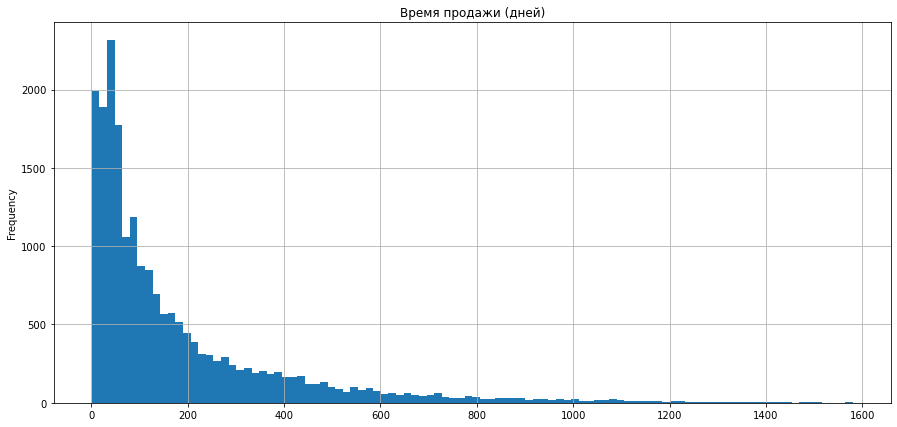

In [34]:
df['days_exposition'].plot(kind='hist', bins=100, figsize=(15, 7), grid=True)
plt.title('Время продажи (дней)')
plt.show()

Распределение смещено вправо. В данных явно присутсвтвуют выбросы. Давайте найдем их. Для этого предварительно взглянем на диаграмму размаха.

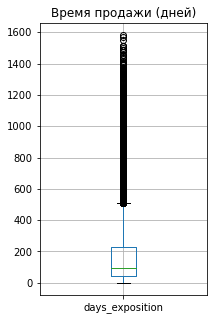

In [35]:
df[['days_exposition']].boxplot(figsize=(3,5))
plt.title('Время продажи (дней)')
plt.show()

Так и есть, вряд-ли нам будут интересны объявления которые висят на площадке более 500 дней. Наверняка про них давно забыли.

Найдем среднее и медианное значение времени продажи. А так же вычислим числовые значения диаграммы размаха.

In [36]:
print(f'Среднее время продажи (дней): {df["days_exposition"].mean()}')
print(f'Медианное время продажи (дней): {df["days_exposition"].median()}')
print(f'Верхнее значение диаграммы размаха (дней): {whisker_find(df["days_exposition"])[1]}')
print(f'Нижнее значение диаграммы размаха (дней): {whisker_find(df["days_exposition"])[0]}')

Среднее время продажи (дней): 180.74139404296875
Медианное время продажи (дней): 95.0
Верхнее значение диаграммы размаха (дней): 510.0
Нижнее значение диаграммы размаха (дней): 1.0


Заново построим гистограмму используя новую информацию

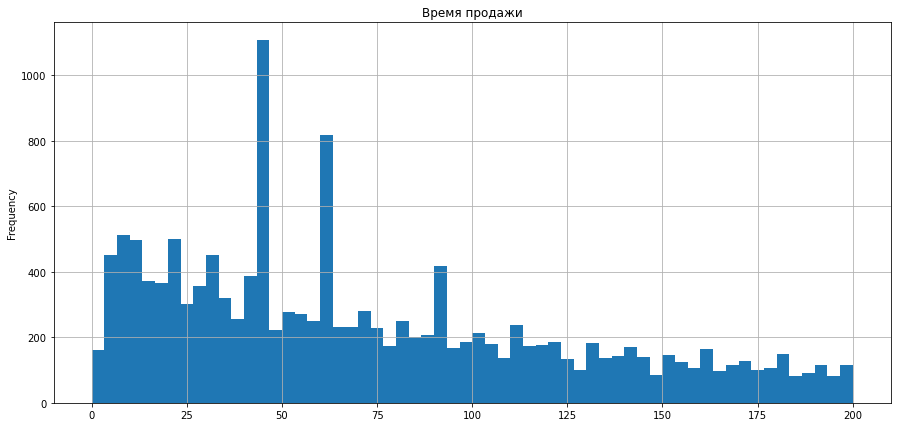

In [37]:
df['days_exposition'].plot(kind='hist', bins=60, range=(0, 200), figsize=(15, 7), grid=True)
plt.title('Время продажи')
plt.show()

#### Вывод
Видно, что чаще всего продажи случаются на 45 и 60 день. 

Быстрые продажи можно считать которые произошли раньше 45 дней. 

Долгие продажи можно считать где срок выше 90 дней.

<a id='research_03'></a>
### 4.3 Редкие и выбивающиеся значения. [▴](#head)

- Убрать редкие и выбивающиеся значения. 
- Описать, какие особенности обнаружены.

В прошлом задании мы опять столкнулись с выбросами в данных. Давайте разберемся с выбросами в наших основых параметрах, чтобы ничего не мешало анализировать данные.

Для начала определим ключевые параметры, в которых выбросы для нас критичны:
- `last_price` — цена на момент снятия с публикации 
- `total_area` — площадь квартиры в квадратных метрах (м²) 
- `rooms` — число комнат 
- `ceiling_height` — высота потолков (м) 
- `floors_total` — всего этажей в доме 
- `balcony` — число балконов 
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

In [38]:
# Создадим 2 списка: 
# Первый с ключевыми параметрами
# Второй с описанием, для удобного вывода графиков и гистограмм.

key_parameters = [
    'last_price',
    'total_area',
    'rooms',
    'ceiling_height',
    'floors_total',
    'balcony',
    'days_exposition']

key_parametrs_title = [
    'Стоимость, руб.',
    'Общая площадь м²',
    'Комнаты, шт.',
    'Высота потолков, м',
    'Всего этажей',
    'Балконы, шт.',
    'Срок продажи, дней']

Теперь построим диаграммы размаха для всех ключевых параметров. Для автоматизации применим цикл.

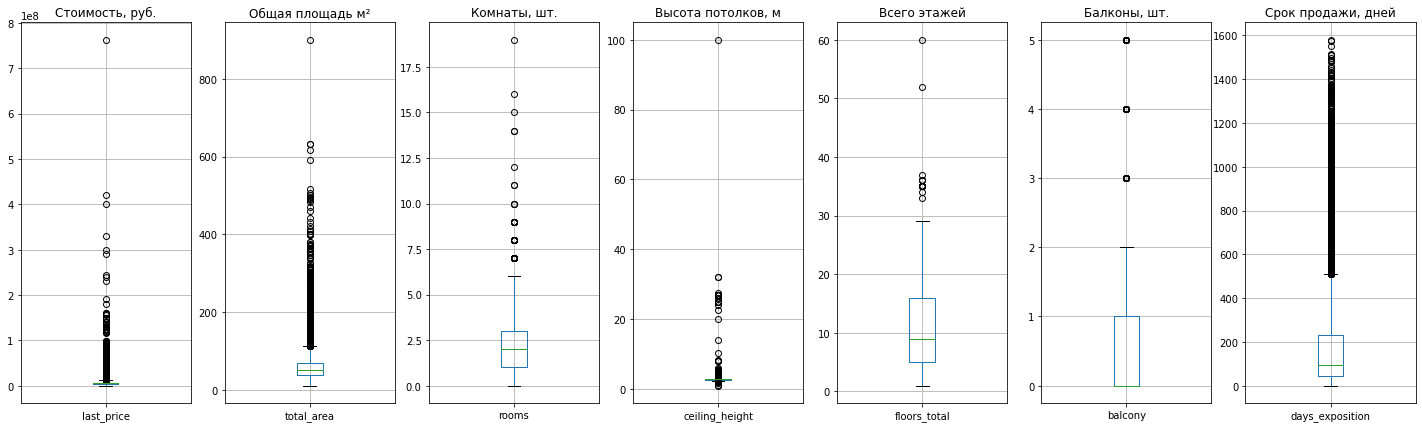

In [39]:
plt.figure(figsize=(25, 7))

# В цикле мы распаковываем 3 итератора с помощью функции zip() из наших списков и одного генератора
# То есть цикл будет брать по одному значению из каждого списка по порядку за одну итерацию

for col, num, title in zip(key_parameters, range(1, 8), key_parametrs_title):
    plt.subplot(1, 7, num) # Генератор поставляет нам значения по порядку с 1 до 7, чтобы менялось положение диаграммы
    df[[col]].boxplot() # строим диаграмму размаха по Series, который берем из нашего первого списка
    plt.title(title) # Выводим заголовок, который берем из нашего второго списка
plt.show()

А так же для более наглядной картины выведем описание числовых данных для этих столбцов.

In [40]:
df[key_parameters].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,balcony,days_exposition
count,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,20394.000000
mean,6.540058e+06,60.322979,2.070656,2.771763,10.675876,0.593677,180.741394
std,1.091093e+07,35.657131,1.078591,0.989265,6.594725,0.960660,219.734482
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.600000,5.000000,0.000000,45.000000
50%,4.646000e+06,52.000000,2.000000,2.771499,9.000000,0.000000,95.000000
75%,6.790000e+06,69.699997,3.000000,2.771499,16.000000,1.000000,231.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,5.000000,1580.000000


Так же найдем значения "усов" нашей коробки для всех ключевых значений. Это поможет нам более точно анализировать данные.

In [41]:
temp_dict = {'Параметр': key_parametrs_title, 'Нижний ус': [], 'Верхний ус': []}

for key, title in zip(key_parameters, key_parametrs_title):
    temp_dict['Нижний ус'] += [whisker_find(df[key])[0]]
    temp_dict['Верхний ус'] += [whisker_find(df[key])[1]]

display(pd.DataFrame(temp_dict))

,Параметр,Нижний ус,Верхний ус
0,"Стоимость, руб.",12190.00,11875000.00
1,Общая площадь м²,12.00,114.25
2,"Комнаты, шт.",0.00,6.00
3,"Высота потолков, м",2.34,3.03
4,Всего этажей,1.00,32.50
5,"Балконы, шт.",0.00,2.50
6,"Срок продажи, дней",1.00,510.00


Отлично, теперь можно приступить к выверке аномальных значечний.

Пройдемся по каждому параметру и опираясь на наши графики и значения в таблицах, а так же на здравый смысл, попробуем для каждой из наших ключевых характеристик:
- установить нижнее пороговое значение 
- установить верхнее пороговое значение
- внесем все это в два списка `low_cut` и `high_cut` куда впишем эти значения в порядке, который соответствует списку `key_parametrs`
- с помощью цикла соберем индексы аномальных значечний и разом удалим их.

Плюс такого решения в том, что после этих действий будет удобно менять значения в этих списках, подгоняя результат под более адекватный.

P.S. Наверное словарь бы подошел больше для этого, более наглядно бы было, но очень хочется спать )) Переделывать цикл на распаковку словаря для меня сегодня ту мач.

- `last_price` — По диаграмме размаха видно, что у нас есть явные выбросы - значения 300+ млн. Но так же похоже на то, что в данных присутсвует элитная недвижимость. Нижний "ус" уперся в значение 12 тыс. руб, что явно выброс. Оставим все значения от **300 тыс до 50 млн.**
- `total_area` — Нижний "ус" показывает **12 кв.м** Вполне себе современная студия (в японском стиле :) ), оставим это значение. Верхней значение "ус" отметил на границе 115 кв.м, предположим что выбросы начинаются за значением **200 кв.м**
- `rooms` — Никогда не был в квартире с 20,ю комнатами. Но возможно 6 и бывает в квартирах по 200 метров. Оставим значения **от 0 до 6.**
- `ceiling_height` — Тут явно какая то ошибка потолки выше 20-ти метров это что-то из области дворцов, не говоря уже про 100 метровый потолок. Нижнее значение возьмем по "усу", там вполне реальные **2.34** А вот верхнее поставим **4 метра**. 
- `floors_total` — Насколько я знаю самое высокое здание Спб это Лахта-Центр 88 этажей. Ниже Лидер Тауэр высотой 42 этажа. Оставим значений **от 1 до 42.**
- `balcony` — 4 балкона звучит весьма правдоподобно. Тут оставим диапазон значений, **от 0 до 4**.
- `days_exposition` — Срок продажи оставим от **1 до 730 дней**. Пусть Максимальная продажа длилась 2 года.

In [42]:
low_cut = [300000,
           12,
           0,
           2.34,
           1,
           0,
           1]
high_cut = [50000000,
            200,
            6,
            4,
            42,
            4,
            730]

**Подсчет доли выбросов в данных**

Давайте посмотрим, насколько много выбросов в каждой из категорий ключевых данных. Для этого напишем следующий цикл.

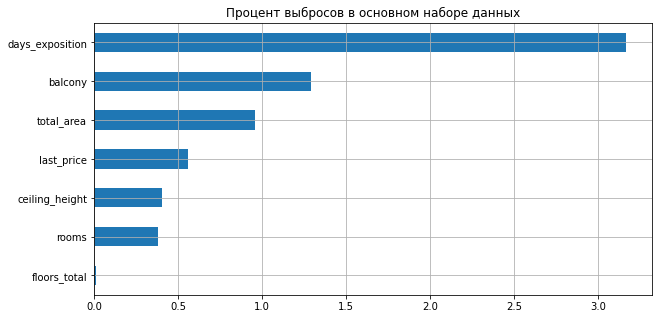

In [43]:
dict_percent = {} # Создаем пустой словарь, туда будем записывать данные в офрмате {'colname': доля_выброса}
for col, low, high in zip(key_parameters, low_cut, high_cut):
        dict_percent[col] = df[(df[col] < low) | (df[col] > high)].shape[0] / df.shape[0] * 100 
                
        # Берем количество строк отфильтрованного датасета методом shape[0] 
        # и делим на общее количество строк исходного датасета df.shape[0] * 100

# Далее строим горизонтальную столбчатую диаграмму по значениям собранного словаря.

(
pd.Series(dict_percent). # Создаем из словаря Series и строим диаграмму
    sort_values().
    plot(kind='barh',figsize=(10, 5), grid=True, title='Процент выбросов в основном наборе данных')
)
plt.show()

Из диаграммы видно что самая большая часть выбросов у нас в сроке размещения, почти 3,5%. Остальные параметры незначительно малы.

Данные показатели были собраны по каждому из параметров отдельно. Но наверняка у этих показателей выбросы встречаются в разных строках. Давайте узнаем общее количество выбросов по всем параметрам. 

Для этого сделаем следующее:

In [44]:
drop_set = set() # Создаем пустое множество, туда будем складывать индексы в которых встречаются выбросы
                # так как в множестве могут содержаться только уникальные значения
                # мы можем в цикле прибавлять индексы в это множество со всех итераций, не боясь что 
                # данные задублируются
            
for col, low, high in zip(key_parameters, low_cut, high_cut):
    drop_set = drop_set | set(df[(df[col] < low) | (df[col] > high)].index)
# Множество = Множество + Множество(Индексы всех найденных выбросов, в каждой итерации)

print(f'Количество строк соддержащие выбросы: {len(drop_set)}')
print(f'Их процент в общем количестве: {len(drop_set) / df.shape[0]:.1%}')

Количество строк соддержащие выбросы: 1399
Их процент в общем количестве: 5.9%


Итак доля всех выбросов по всем нашим ключевым параметрам = 5,9%. Мы вполне можем пожертвовать таким количеством.

Сформируем новый датасет `df_clean` который уже не будет содержать выбросов исходного, заодно обнулим индексы.

In [45]:
df_clean = df.drop(drop_set, axis=0).reset_index(drop=True).copy() # формируем новый датасет
                # в качестве строк для дропа подсовываем наше множество

# А теперь сравним с помощью функции describe() как изменилась статистика исходного датасета
print('Исходный датасет:')
display(df[key_parameters].describe())

print('Очищенный датасет:')
display(df_clean[key_parameters].describe())

Исходный датасет:


,last_price,total_area,rooms,ceiling_height,floors_total,balcony,days_exposition
count,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,20394.000000
mean,6.540058e+06,60.322979,2.070656,2.771763,10.675876,0.593677,180.741394
std,1.091093e+07,35.657131,1.078591,0.989265,6.594725,0.960660,219.734482
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.600000,5.000000,0.000000,45.000000
50%,4.646000e+06,52.000000,2.000000,2.771499,9.000000,0.000000,95.000000
75%,6.790000e+06,69.699997,3.000000,2.771499,16.000000,1.000000,231.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,5.000000,1580.000000


Очищенный датасет:


,last_price,total_area,rooms,ceiling_height,floors_total,balcony,days_exposition
count,2.216600e+04,22166.000000,22166.000000,22166.000000,22166.000000,22166.000000,19144.000000
mean,5.769317e+06,57.244514,2.010466,2.735522,10.705179,0.540693,149.931000
std,4.536370e+06,25.520668,0.974837,0.195187,6.590812,0.825512,155.630264
min,4.300000e+05,12.000000,0.000000,2.340000,1.000000,0.000000,1.000000
25%,3.400000e+06,39.925001,1.000000,2.600000,5.000000,0.000000,43.000000
50%,4.550000e+06,51.000000,2.000000,2.771499,9.000000,0.000000,90.000000
75%,6.500000e+06,67.599998,3.000000,2.771499,16.000000,1.000000,205.000000
max,5.000000e+07,200.000000,6.000000,4.000000,36.000000,4.000000,730.000000


На первый взгляд выглядит отлично. 

Аномальные значение исчезли и все основные показатели выглядят весьма приближенно к реальности.

Теперь сравним с помощью гистограмм, как повлияли наши действия по удалению выбросов.

Сначала выведем гистограммы ключевых папаметров в исходном датасете, а потом в очищенном.

Исходный датафрейм


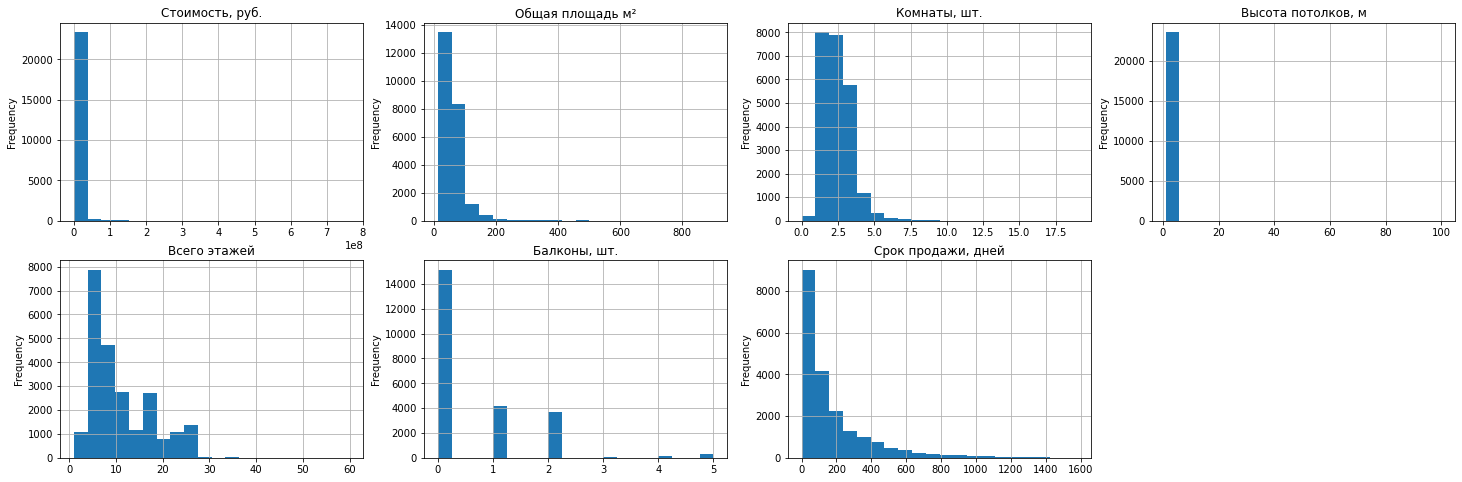

Очищенный датафрейм


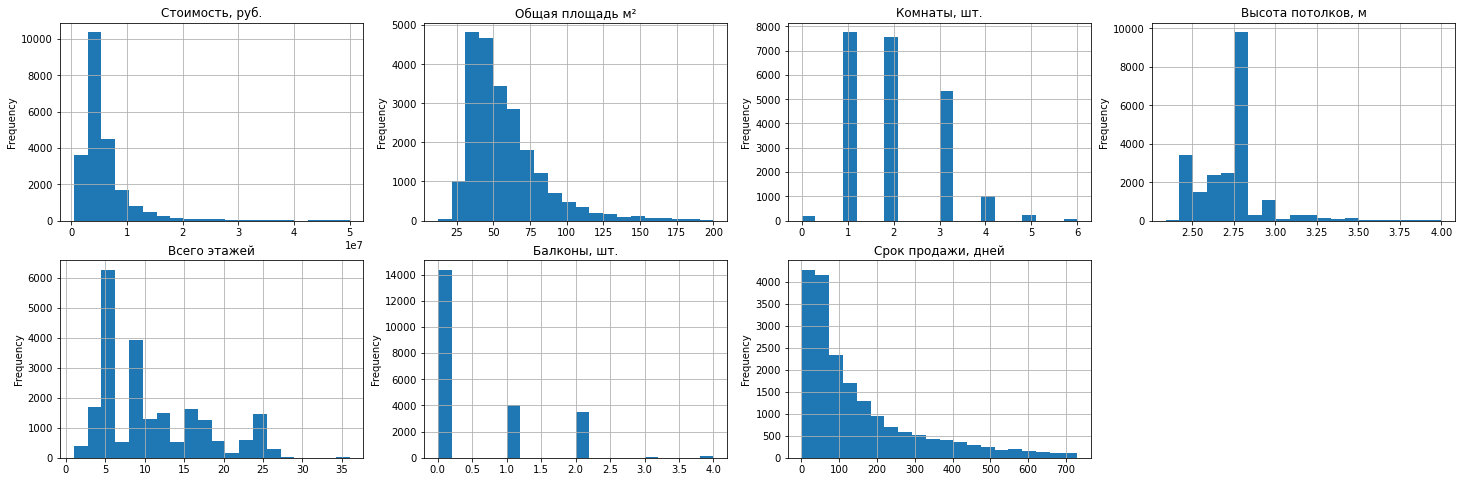

In [46]:
print('Исходный датафрейм')
plt.figure(figsize=(25, 8))
for col, num, title in zip(key_parameters, range(1, 8), key_parametrs_title):
    plt.subplot(2, 4, num)
    df[col].plot(kind='hist', bins=20, grid=True)
    plt.title(title)
plt.show()

print('Очищенный датафрейм')
plt.figure(figsize=(25, 8))
for col, num, title in zip(key_parameters, range(1, 8), key_parametrs_title):
    plt.subplot(2, 4, num)
    df_clean[col].plot(kind='hist', bins=20, grid=True)
    plt.title(title)
plt.show()

Диаграммы приобрели нормальный вид, они отлично читаются и отображают актуальные данные. 

**Вывод**

Мы избавились от выбросов, которых оказалось 5.9% в нашем исходном датасете. Скорей всего это часть элитной недвижимости, параметры которой в разы отличаются от среднестатистической квартиры и в нашей задаче будут только мешать.

Можно считать, что мы избавились от выбросов и приступать к анализу данных.

<a id='research_04'></a>
### 4.4 Факторы влияющие на стоимость квартиры [▴](#head)

Определить какие факторы больше всего влияют на стоимость квартиры 
- изучить, зависит ли цена от площади, числа комнат, удалённости от центра. 
- изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
- также изучите зависимость от даты размещения: дня недели, месяца и года. 

#### Зависимость цены от площади квартиры

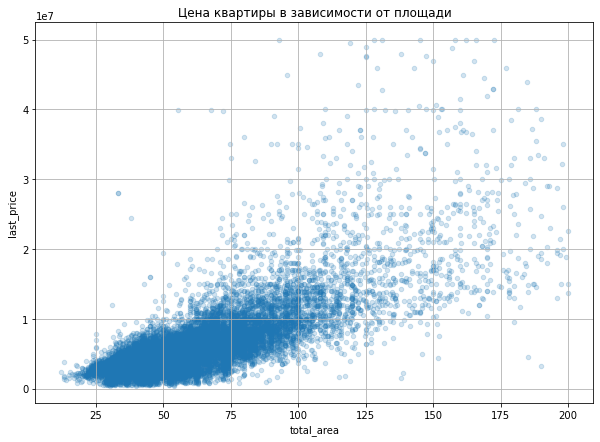

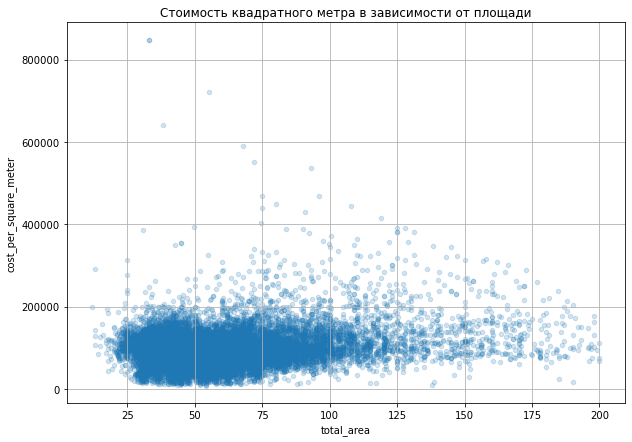

In [47]:
df_clean.plot(kind='scatter', x='total_area', y='last_price', figsize=(10, 7), alpha=0.2, grid=True)
plt.title('Цена квартиры в зависимости от площади')
plt.show()

df_clean.plot(kind='scatter', x='total_area', y='cost_per_square_meter', figsize=(10, 7), alpha=0.2, grid=True)
plt.title('Стоимость квадратного метра в зависимости от площади')
plt.show()

Видная явная закономерность роста цены квартиры от ее площади.

И так же виден обратный эффект отношения стоимсоти квадратного метра к площади. Чем больше площадь, тем меньше стоимость квадратного метра. Однако эта закономерность ярче выражена на больших площадях, выше 100 кв.м.

#### Зависимость цены от числа комнат

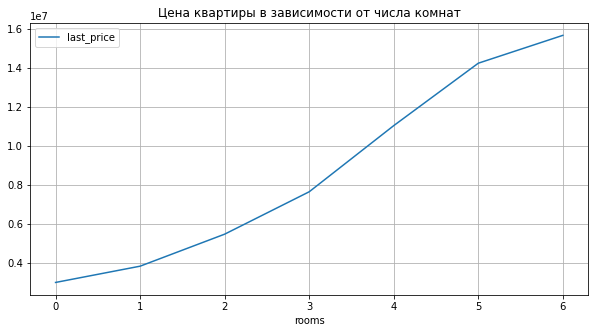

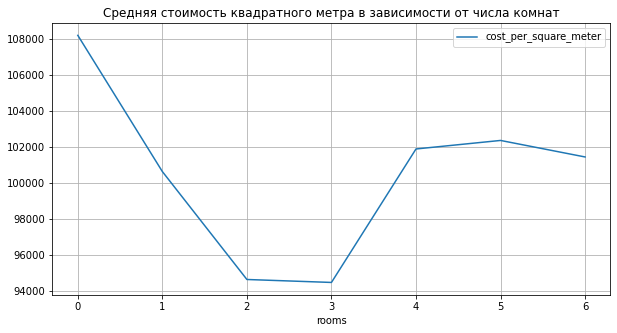

In [48]:
(
df_clean.
    pivot_table(index='rooms', values='last_price', aggfunc='mean').
    plot(use_index=True, figsize=(10, 5), grid=True)
)
plt.title('Цена квартиры в зависимости от числа комнат')
plt.show()

(
df_clean.
    pivot_table(index='rooms', values='cost_per_square_meter', aggfunc='mean').
    plot(use_index=True, figsize=(10, 5), grid=True)
)
plt.title('Средняя стоимость квадратного метра в зависимости от числа комнат')
plt.show()

Видна практически прямолинейная зависимость от числа комнат. Причем как и в случаее с площадью, цена от количества комнат растет, а стоимость квадратного метра падает. Правда когда речь заходит про очень большие квартиры, 4+ комнат, стоимость кв.м опять прыгает. Видимо это связано с тем, что жилье переходит в другую категорию (элитная недвижимость).

Так же, эту сильную зависимость можно увидеть на коэффициенте корреляции Пирсона:

In [49]:
print('Отношение числа комнат к цене:', df_clean['rooms'].corr(df_clean['last_price']))

Отношение числа комнат к цене: 0.46355142950397676


#### Зависимость цены от удаленности от центра

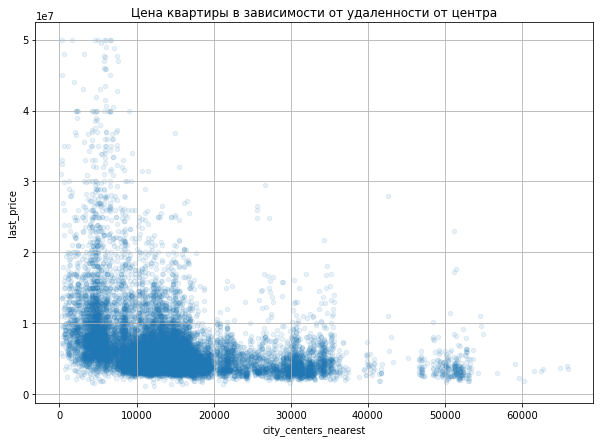

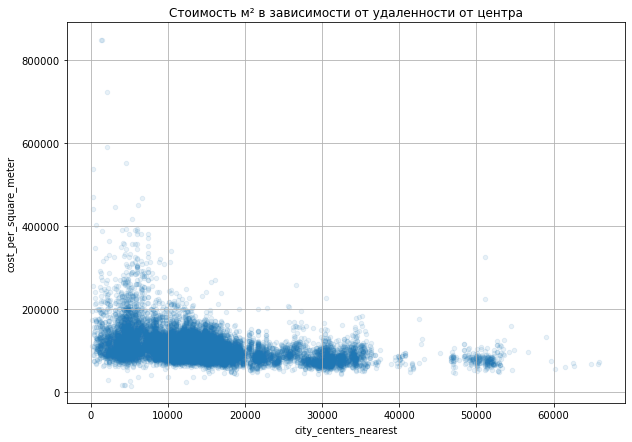

In [50]:
df_clean.plot(kind='scatter', x='city_centers_nearest', y='last_price', figsize=(10, 7), alpha=0.1, grid=True)
plt.title('Цена квартиры в зависимости от удаленности от центра')
plt.show()

df_clean.plot(kind='scatter', x='city_centers_nearest', y='cost_per_square_meter', figsize=(10, 7), alpha=0.1, grid=True)
plt.title('Стоимость м² в зависимости от удаленности от центра')
plt.show()

Видна зависимость цены и стоимости квадратного метра в зависимости от удаления от центра. 

Цена падает постепенно, затем после 20 км. стабилизируется.

То же происходит со стоимостью квадратного метра. После удаления в 20 км.

#### Зависимость стоимости м² от этажа

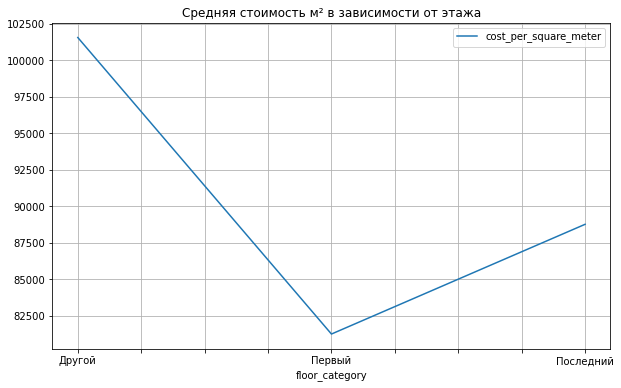

In [51]:
(
df_clean.
    pivot_table(index='floor_category', values='cost_per_square_meter', aggfunc='mean').
    plot(use_index=True, figsize=(10, 6), grid=True)
)
plt.title('Средняя стоимость м² в зависимости от этажа')
plt.show()

Видим, благодаря средней стомости квадратного метра, что первый и последний этажи не особо ценятся, относительно других. Причем первый этаж менее предпочтительный при выборе недвижимости, отсюда и самая низкая стоимость квадратного метра.

#### Зависимость цены от периода размещения

**День недели**

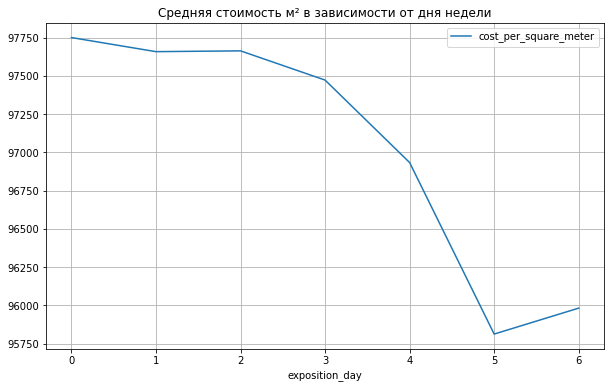

In [52]:
(
df_clean.
    pivot_table(index='exposition_day', values='cost_per_square_meter', aggfunc='mean').
    plot(use_index=True, figsize=(10, 6), grid=True)
)
plt.title('Средняя стоимость м² в зависимости от дня недели')
plt.show()

Данные колеблются не очень сильно. Можно сказать что зависимости практически нет. На выходные стоимость квадратного метра чуть падает. С чем это связано, непонятно.

**Месяц**

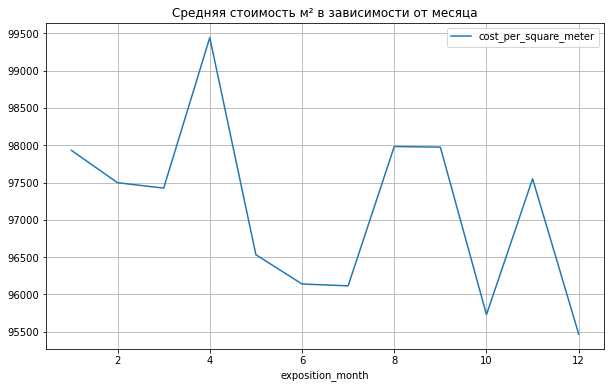

In [53]:
(
df_clean.
    pivot_table(index='exposition_month', values='cost_per_square_meter', aggfunc='mean').
    plot(use_index=True, figsize=(10, 6), grid=True)
)
plt.title('Средняя стоимость м² в зависимости от месяца')
plt.show()

В летние месяцы стоимость квадратного метра ниже чем в остальные. Видимо это связано с падением рынка в этот месяц, так как большое количество человек разъезжается по отпускам, откладывая дела с недвижимостью на другие месяцы. Отсюда и просадка по стоимости. Те кому горит продать именно в эти месяцы вынуждены скидывать цену компенсируя низкий спрос. Так же видим падение под новогодние праздники.

**Год**

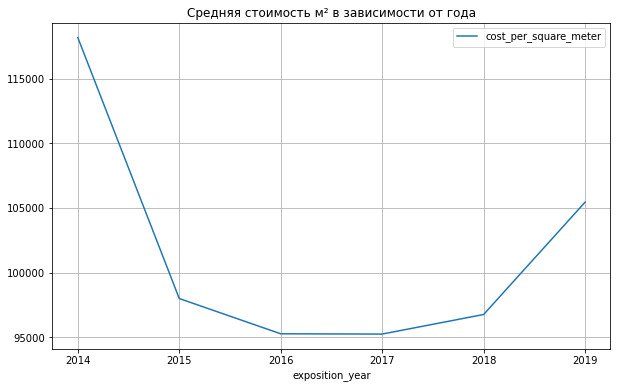

In [54]:
(
    df_clean.
    pivot_table(index='exposition_year', values='cost_per_square_meter', aggfunc='mean').
    plot(use_index=True, figsize=(10, 6), grid=True)
)
plt.title('Средняя стоимость м² в зависимости от года')
plt.show()

Четко видно просадку рынка после кризиса 2014 года. Покупательская способность граждан очень сильно упала. Как следствие поплыла вниз и стоиомость недвижимости, однако к 2019 году ситуация начала выправляться.

#### Зависимость цены и стоимости от прочих параметров

Для начала создадим список параметров, для которрых мы бы хотели рассчитать корреляцию.

In [55]:
corr_slice = [
    'last_price', 
    'cost_per_square_meter', 
    'total_area', 
    'rooms',
    'ceiling_height',
    'floor', 
    'exposition_year',
    'airports_nearest',
    'city_centers_nearest',
    'parks_around_3000',
    'parks_nearest',
    'ponds_around_3000',
    'ponds_nearest'
]

Теперь рассчитаем корреляцию, относительно цены и стоимости квадратного метра.

In [56]:
(
    display(
        df_clean[corr_slice].
        corr()[['last_price', 'cost_per_square_meter']]
        .style.background_gradient(axis=None, cmap='YlOrRd'))
)

,last_price,cost_per_square_meter
last_price,1.000000,0.723430
cost_per_square_meter,0.723430,1.000000
total_area,0.763912,0.203046
rooms,0.463551,-0.036711
ceiling_height,0.380992,0.267247
floor,0.062649,0.174804
exposition_year,-0.021569,0.049191
airports_nearest,-0.034599,-0.043134
city_centers_nearest,-0.330800,-0.371656
parks_around_3000,0.189170,0.167907


#### Вывод

**Цена**
- Видно сильную положительную зависимость цены от площади, количества комнат. 
- Так же среднюю положительную зависимость от высоты потолков, этажа и наличи водема рядом с квартирой.
- Отрицательная зависимость связана с удалением от центра города.

**Стоимость квадратного метра**
- Видно положительную зависимость от высоты потолков, высоты этажа
- Отрицательная зависимость от площади квартиры и количества комнат
- Сильная отрицательная зависимость, так же как и с ценой зависит от удаления от центра

<a id='research_05'></a>
### 4.5  Анализ недвижимости относительно населенных пунктов [▴](#head)


- Выбрать 10 населённых пунктов с наибольшим числом объявлений. 
- Посчитать среднюю цену квадратного метра в этих населённых пунктах. 
- Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name` 

#### Выбрать 10 населенных пунктов с большим количеством объявлений

In [57]:
# Для решения этой задачи применим сводную таблицу

# Создадим отдельную переменную, чтобы переиспользовать ее для решения этой задачи
df_locality_top_10_count = df_clean.pivot_table(
    index='locality_name', 
    values='cost_per_square_meter', 
    aggfunc=['count', 'mean']).sort_values(by=('count', 'cost_per_square_meter'), ascending=False).head(10)
    # Сгруппируем нашу сводную таблицу по населенным пунктам, найдем количество объявлений
    # а так же среднюю стоимость квадратного метра по ним

display(df_locality_top_10_count)

,count,mean
,cost_per_square_meter,cost_per_square_meter
locality_name,,
Санкт-Петербург,14615,111938.280765
посёлок Мурино,492,85723.443588
посёлок Шушары,424,78678.463176
Всеволожск,376,68800.505217
Пушкин,350,102959.443059
Колпино,325,75178.953993
посёлок Парголово,319,90179.108419
Гатчина,286,68751.715875


#### Средняя цена квадратного метра

Отсортируем среднюю стоимость квадратного метра по убыванию и выведем в виде столбчатой диаграммы:

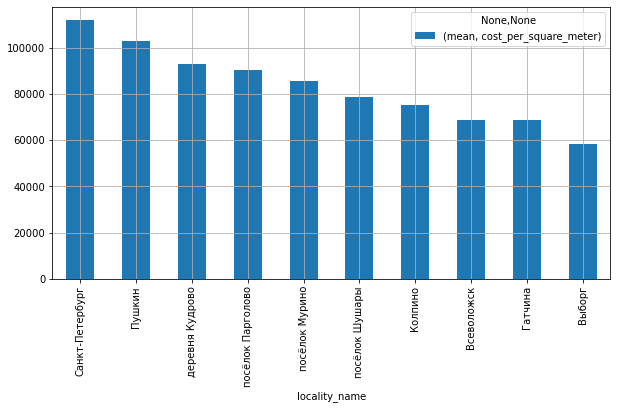

In [58]:
(
    df_locality_top_10_count
    .sort_values(by=('mean', 'cost_per_square_meter'), ascending=False)
    .plot(kind='bar', use_index=True, y=('mean', 'cost_per_square_meter'), figsize=(10, 5), grid=True)
)
plt.show()

Как видим, самая высокая цена квадратного метра в самом Санкт-Петербурге, а так-же ближайших городах, населенных пунктах рядом с достопримечательностями.

#### Населенные пункты с максимальной стоимостью

In [59]:
(
    df_clean.pivot_table(
    index='locality_name', 
    values='last_price', 
    aggfunc='max').sort_values(by='last_price', ascending=False).head(10)
)

,last_price
locality_name,
Санкт-Петербург,50000000
Пушкин,29500000
посёлок Репино,28000000
Всеволожск,24412900
Зеленогорск,23000000
Сестрорецк,21700000
деревня Бор,20295200
Выборг,19990000
Кронштадт,17630000


Ожидаемо самая высокая стоимость жилья в Санкт-Перербурге, а так же крупых населенных пунктаз рядом с ним. Плюс населенные пункты рядом с достопримечательностями.

#### Населенные пункты с минимальной стоимостью

In [60]:
(
    df_clean.pivot_table(
        index='locality_name', 
        values='last_price', 
        aggfunc='min').sort_values(by='last_price').head(10)
)

,last_price
locality_name,
посёлок станции Свирь,430000
Сланцы,430000
деревня Старополье,440000
деревня Ям-Тесово,450000
деревня Вахнова Кара,450000
городской посёлок Будогощь,450000
поселок Совхозный,470000
деревня Выскатка,470000
поселок городского типа Никольский,500000


Ожидаемо тут расположились поселки и деревни.

**Вывод**

Стоимость жилья выше в крупных населенных пунктах ближе к Санкт-Перетрбургу, а так-же рядом с достопримечательностями.

Обратно пропорциональна стоимость в деревнях и поселках. Чем меньше и дальше населенный пункт от Спб тем ниже стоимость.

<a id='research_06'></a>
### 4.6 Исследование зависимости цены от расстояния от центра города [▴](#head)

Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
- Выделить квартиры в Санкт-Петербурге `locality_name`. Наша задача — выяснить, какая область входит в центр. 
- Создать столбец с расстоянием до центра в километрах: округлить до целых значений. 
- после этого посчитать среднюю цену для каждого километра. 
- построить график: он должен показывать, как цена зависит от удалённости от центра. 
- определить границу, где график сильно меняется, — это и будет центральная зона. 

Создадим новый датафрейм `spb_flat`. Поместим в него только значения `Санкт-Петербурга`, заодно удалим из выборки пустые значения в столбце `city_centers_nearest`

In [61]:
spb_flat = df_clean.query('locality_name == "Санкт-Петербург" and city_centers_nearest == city_centers_nearest').copy()

In [62]:
spb_flat['center_distance_km'] = spb_flat['city_centers_nearest'] / 1000 # Получим значения для нового столбца
                                                                # Для этого разделим значения в метрах на 1000

spb_flat = spb_flat.astype({'center_distance_km': 'int32',}) # Округлим полученные значения
                                                        # Для этого сменим тип столбца с float на int

spb_flat[['city_centers_nearest', 'center_distance_km']].head() # Проверим созданный столбец

# Все ОК

,city_centers_nearest,center_distance_km
0,16028.0,16
2,13933.0,13
3,8098.0,8
6,11634.0,11
8,15008.0,15


Построим график

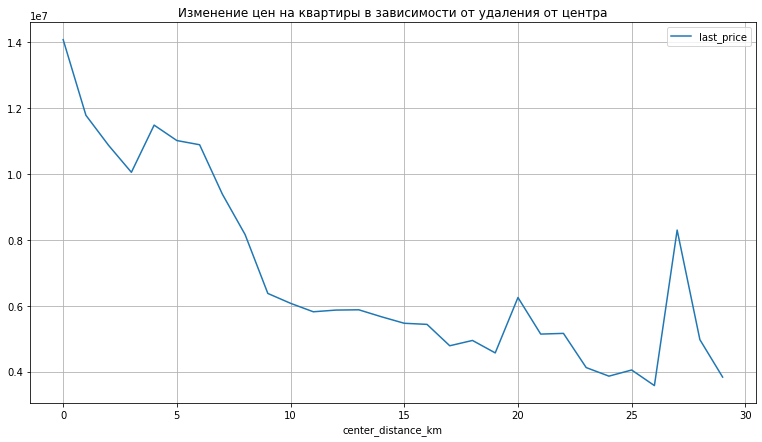

In [63]:
(
    spb_flat.pivot_table(index='center_distance_km', values='last_price', aggfunc='mean')
    .plot(use_index=True, y='last_price', figsize=(13,7), grid=True)
)
plt.title('Изменение цен на квартиры в зависимости от удаления от центра')
plt.show()

#### Вывод

Видим сильную отрицательную корреляцию. Скачек цены в районе 27 км. скорей всего связан с тем, что в этой зоне находятся достопримечательности и цена на недвижимость там высокая. Как раз примерно на этом расстоянии расположено царское село, Екатерининский дворец и т.п.

На графике виден отчетливый переход цены за квартиру на границу 10 км. от центра. Будем считать зону в 10 км. центром города.

<a id='research_07'></a>
### 4.7 Стоимость квартир в центре города [▴](#head)


Выделить сегмент квартир в центре: 
- проанализировать эту территорию и изучить следующие параметры: `площадь`, `цена`, `число комнат`, `высота потолков` 
- также выделить факторы, которые влияют на стоимость квартиры: `число комнат`, `этаж`, `удалённость от центра`, `дата размещения объявления` 
- сделать выводы. Отличаются ли они от общих выводов по всей базе?

Создадим датафрейм `spb_flat_center`, куда поместим только квариры находящиеся в центре города.

In [64]:
spb_flat_center = spb_flat.query('center_distance_km < 10').copy()

#### Зависимость стоимости от площади в центре города

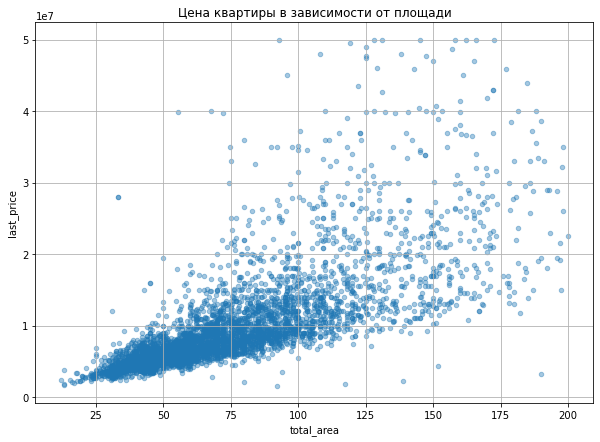

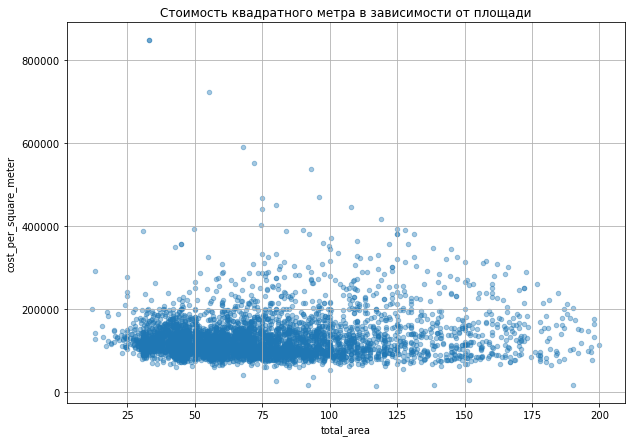

In [65]:
spb_flat_center.plot(kind='scatter', x='total_area', y='last_price', figsize=(10, 7), alpha=0.4, grid=True)
plt.title('Цена квартиры в зависимости от площади')
plt.show()

spb_flat_center.plot(kind='scatter', x='total_area', y='cost_per_square_meter', figsize=(10, 7), alpha=0.4, grid=True)
plt.title('Стоимость квадратного метра в зависимости от площади')
plt.show()

Видная явная закономерность роста цены квартиры от ее площади.

И так же виден обратный эффект отношения стоимсоти квадратного метра к площади. Чем больше площадь, тем меньше стоимость квадратного метра. Однако это ярко выражено только на больших площадях, 100+ кв.м.

#### Зависимость цены от числа комнат в центре

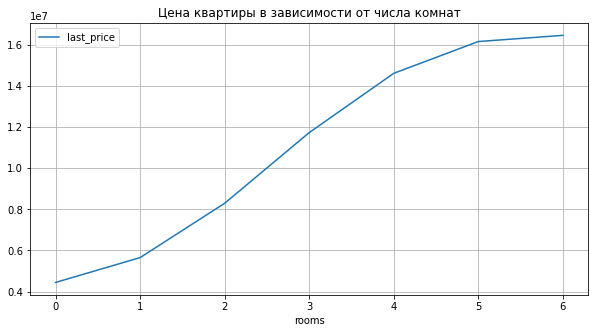

In [66]:
(
spb_flat_center.
    pivot_table(index='rooms', values='last_price', aggfunc='mean').
    plot(use_index=True, figsize=(10, 5), grid=True)
)
plt.title('Цена квартиры в зависимости от числа комнат')
plt.show()

Видна практически прямолинейная зависимость от числа комнат. Причем как и в случаее с площадью, цена от количества комнат растет.

#### Зависимость цены от высоты потолков

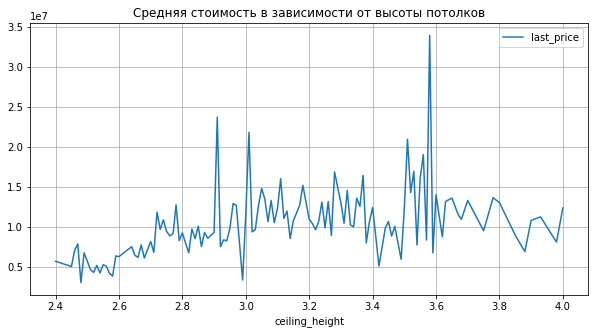

In [67]:
(
spb_flat_center.
    pivot_table(index='ceiling_height', values='last_price', aggfunc='mean').
    plot(use_index=True, figsize=(10, 5), grid=True)
)
plt.title('Средняя стоимость в зависимости от высоты потолков')
plt.show()

Данные достаточно зашумлены, но в целом проглядывается тенденция роста цены от высоты потолка.

#### Корреляция Пирсона для квартир в центре

In [68]:
print('Корреляция Пирсона для квартир в центре:')
(
    display(
        spb_flat_center[corr_slice].
        corr()[['last_price', 'cost_per_square_meter']]
        .style.background_gradient(axis=None, cmap='YlOrRd'))
)


Корреляция Пирсона для квартир в центре:


,last_price,cost_per_square_meter
last_price,1.000000,0.696671
cost_per_square_meter,0.696671,1.000000
total_area,0.735130,0.109819
rooms,0.447386,-0.108803
ceiling_height,0.246087,0.096464
floor,0.102469,0.103254
exposition_year,-0.033865,0.065048
airports_nearest,-0.042490,-0.010502
city_centers_nearest,-0.225978,-0.134211
parks_around_3000,0.134527,0.114600


#### Корреляция Пирсона для квартир по всем значениям очищеного датафрейма

In [69]:
print('Корреляция Пирсона для исходного датафрейма:')
(
    display(
        df_clean[corr_slice].
        corr()[['last_price', 'cost_per_square_meter']]
        .style.background_gradient(axis=None, cmap='YlOrRd'))
)

Корреляция Пирсона для исходного датафрейма:


,last_price,cost_per_square_meter
last_price,1.000000,0.723430
cost_per_square_meter,0.723430,1.000000
total_area,0.763912,0.203046
rooms,0.463551,-0.036711
ceiling_height,0.380992,0.267247
floor,0.062649,0.174804
exposition_year,-0.021569,0.049191
airports_nearest,-0.034599,-0.043134
city_centers_nearest,-0.330800,-0.371656
parks_around_3000,0.189170,0.167907


**Вывод**

В отличии от всего массива данных, для квартир в центре:
- слабее положительная корреляция относительно высоты потолков
- слабее отрицательная корреляция относительно удаленности от центра
- сильнее корреляция относительно наличия пруда рядом с квартирой

<a id='final_conclusion'></a>
## 5. Общий вывод

<a id='final_conclusion_01'></a>
### 5.1 Общая информация [▴](#head)

При осмотре предоставленного датасета выяснилось, что он содержит следубщие проблемы:
- В таблице есть пропущенные значения
- В значениях есть явные выбросы
- Тип числовых данных с состоит из `float64` будет не лишним поменять его на `float32` для экономии памяти.
- Так же неплохо дообогатить исходную таблицу информацией, которыую мы можем высчитать из исходных данных.

<a id='final_conclusion_02'></a>
### 5.2 Предобработка данных [▴](#head)

В ключевых данных о квартире встретилось некоторое кличество пропущенных значений. Часть пришлось удалить, так как адекватной замены подобрать не удалось. Другие мы постарались заменить на наиболее удачное. Не в ключевых столбцах пропущенные значения не обрабатывались.

Удалены пропуски:
- `Всего этажей`
- `Населенный пункт`

Заменены пропуски:
- `Высота потолков` - NaN на `среднее` (2.77)
- `Аппартаменты` - NaN на `False`
- `Балконы` - NaN на `0`

Не тронуты пропуски:
- `living_area`
- `kitchen_area`
- `airports_nearest`
- `city_centers_nearest`
- `parks_around_3000`
- `parks_nearest`
- `ponds_around_3000`
- `ponds_nearest`
- `days_exposition`

Было проведено преобразование типов:
- Вещественные числа переведены из `float64` во `float32` для экономии памяти.
- Дата из текстового значения переведена в `datetime64[ns]`
- Количество балконов переведены из `float64` в `int`
- Цена квартиры переведена из `float64` в `int`


<a id='final_conclusion_03'></a>
### 5.3 Расчеты и дообогщение таблицы [▴](#head)

Были добавлены следующие расчетные столбцы:
- `cost_per_square_meter` - стоимость квадратного метра
- `kitchen_area_ratio` - доля площади кухни от общей
- `life_area_ratio` - доля жилой площади от общей
- `exposition_day` - день недели публикации объявления
- `exposition_month` - месяц публикации объявления
- `exposition_year` - год публикации объявления
- `floor_category` - тип этажа (первый/последний/другой)


<a id='final_conclusion_04'></a>
### 5.4 Итоги исследования [▴](#head)

- [1 Анализ базовых параметров](#research_01)
    - После предварительно проверки, оказалось, что в данных присутствуют достаточно большие выбросы.
    - Мы написали функцию, чтобы оперативно избавляться от выбросов в наших будущих графиках и гистограммах.
    - `Площадь квартиры` - Основная масса квартир на продаже имеют площадь 35-60 метров. При дальнейшем росте площади, количество предложений равномерно снижается.
    - `Цена квартиры` - Гистограмма цен на квартиры совпадает по форме и размеру гистограммой площади. Следовательно основная масса квартир 35-60 метров продается по стоимости 3-5 млн. 
    - `Число комнат` - Из этой гистограммы мы видим что количество двушек и однушек примерно одинаково на рынке, чуть меньше трешек, а квариры с 4 комнатами и более совсем редкость.
    - `Высота потолков` - В среднем на рынке преобладают потолки высотой 2.8 м. Другие значения встречачются значительно реже.
- [2 Время продажи квартиры](#research_02)
    - Чаще всего продажи случаются на 45 и 60 день.
    - Быстрые продажи можно считать которые произошли раньше 45 дней.
    - Долгие продажи можно считать где срок выше 90 дней.
- [3 Редкие и выбивающиеся значения](#research_03)
    - Мы избавились от выбросов, которых оказалось 5.9% в нашем исходном датасете. Скорей всего это часть элитной недвижимости, параметры которой в разы отличаются от среднестатистической квартиры и в нашей задаче будут только мешать. + явные ошибки в данных.
- [4 Факторы влияющие на стоимость квартиры](#research_04)
    - Есть сильная положительная корреляция цены от площади, количества комнат. 
    - Есть среднюю положительная корреляция от высоты потолков, этажа и наличи водема рядом с квартирой.
    - Есть отрицательная корреляция цены в зависимости с удалением от центра города.
    - Есть положительная корреляция стоимости м² от высоты потолков, высоты этажа
    - Есть отрицательная корреляция стоимости м² в зависимости от площади квартиры и количества комнат
    - Есть сильная отрицательная корреляция стоимости м² в зависимости с удалением от центра города.
- [5 Анализ недвижимости относительно населенных пунктов](#research_05)
    - Стоимость жилья выше в крупных населенных пунктах ближе к Санкт-Перетрбургу, а так-же рядом с достопримечательностями.
    - Обратно пропорциональна стоимость в деревнях и поселках. Чем меньше и дальше населенный пункт от Спб тем ниже стоимость.
- [6 Исследование зависимости цены от расстояния от центра города](#research_06)
    - Есть сильная отрицательная корреляция цены в зависимости от удаления от центра города. 
    - Есть скачек цены в районе 27 км. скорей всего связан с тем, что в этой зоне находятся достопримечательности и цена на недвижимость там высокая.
    - Есть отчетливый переход цены за квартиру на границу 10 км. от центра. Это граница центра города.
- [7 Стоимость квартир в центре города](#research_07)
    - В отличии от всего массива данных, для квартир в центре:
    - слабее положительная корреляция относительно высоты потолков
    - слабее отрицательная корреляция относительно удаленности от центра
    - сильнее корреляция относительно наличия пруда рядом с квартирой